In [1]:
import sys  
sys.path.insert(1, "..")
from hfsp_scripts import hfsp_functions as hfsp
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats
from scipy import optimize
import networkx as nx
import pandas as pd

# Define variables for GA20Ox-1

In [2]:
temp_sch_1wC = np.array([168])
temp_sch_2wC = np.array([336])
temp_sch_4wC = np.array([672])
temp_sch_1wCW = np.array([20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,8])
temp_sch_2wCW = np.array([20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,16])
temp_sch_4wCW = np.array([20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,
                          20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,12])
temp_sch_2wC_8hW = np.array([336,8])
temp_sch_2wC_24hW = np.array([336,24])
temp_sch_2wC_72hW = np.array([336,72])
      

# manual prediction/fitting from Rishi's data

p_cold_2d = 0.00006
p_warm_2d = 0.02
p_cold_3d = 0.00005
p_warm_3d = 0.025
p_edge = 1 # we use MR0 to fit the parameters.

p_decay0 = 0
p_decay1 = 0.000006
p_decay2 = 0.000005

# Define g = the SAM template and also define the initial state.

In [6]:
T_3d = hfsp.create_tissue("../inputs/3d_sam.csv", True)
g = T_3d

# Initial state is alomost 0.94% active nodes (value 10WSD) == around 8 random cells activated in a 3D template.

TENwSD_state = np.concatenate((np.zeros(len(g.nodes()), dtype = int) , np.ones(len(g.edges()), dtype = int)))
TENwSD_state[0] = 1
TENwSD_state[100] = 1
TENwSD_state[200] = 1
TENwSD_state[300] = 1
TENwSD_state[400] = 1
TENwSD_state[500] = 1
TENwSD_state[600] = 1
TENwSD_state[700] = 1
TENwSD_state[800] = 1

hfsp.update_spontaneous(g, jump_state = TENwSD_state)

# Ok, now TENwSD_state is a random state with 0.93% active nodes

In [15]:
ens_1 = hfsp.ensemble(g, temp_sch_4wCW, p_decay2, p_cold_3d, p_warm_3d, p_edge = 1, 
                   rule_code_node = [0,0.5], rule_code_edge = None, ensemble_size = 3, jump_state = TENwSD_state) 

In [16]:
ens_1

,time,sim_1,sim_2,sim_3,mean,std,upper,lower
0,0,4.220399,1.055100,1.0551,2.110199,1.827486,4.178195,0.042204
1,1,4.220399,1.055100,1.0551,2.110199,1.827486,4.178195,0.042204
2,2,4.220399,1.055100,1.0551,2.110199,1.827486,4.178195,0.042204
3,3,4.220399,1.055100,1.0551,2.110199,1.827486,4.178195,0.042204
4,4,4.220399,1.055100,1.0551,2.110199,1.827486,4.178195,0.042204
...,...,...,...,...,...,...,...,...
800,800,0.468933,1.641266,1.4068,1.172333,0.620340,1.874314,0.470352
801,801,0.468933,1.641266,1.4068,1.172333,0.620340,1.874314,0.470352
802,802,0.468933,1.641266,1.4068,1.172333,0.620340,1.874314,0.470352
803,803,0.468933,1.641266,1.4068,1.172333,0.620340,1.874314,0.470352


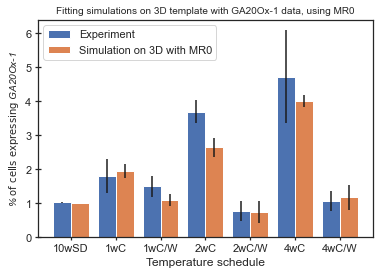

In [17]:
# manual fitting using 3D template.

labels = ['10wSD', '1wC', '1wC/W', '2wC', '2wC/W', '4wC', '4wC/W']

Rishi_data_GA = [1.03, 1.8,	1.5, 3.7, 0.78,	4.73, 1.07]
yerr_exp = [0.03, 0.86,	0.53, 0.6, 0.5, 2.36, 0.5]

Swanand_simulation_3DMR050 = [1,1.94,1.1,2.65,0.74,4,1.17]
yerr_sim_3DMR050 = [0,0.36,0.3,0.48,0.57,0.3,0.62]

Swanand_simulation_2DMR050 = [1,2.6,1.06,2.36,1.53,5.9,2.5]
yerr_sim_2DMR050 = [0,0.5,0.5,0.73,1.13,1.95,1.5]

x = np.arange(len(labels))  # the label locations
x_axis = np.arange(len(labels))

# Multi bar Chart

sns.set()
sns.set_style("white")
fig, ax = plt.subplots()
ax.bar(x_axis-0.2, Rishi_data_GA, width = 0.4, yerr = np.divide(yerr_exp, 1.73), label = 'Experiment')
ax.bar(x_axis+0.2, Swanand_simulation_3DMR050 , width=0.4, yerr = np.divide(yerr_sim_3DMR050, 1.73), label = 'Simulation on 3D with MR0')
ax.set_ylabel(r"% $\rm{of\ cells\ expressing}$ GA20Ox-1", font = "Arial", style = 'italic')
ax.set_xlabel("Temperature schedule")
ax.set_title('Fitting simulations on 3D template with GA20Ox-1 data, using MR0', font = "Arial")
plt.xticks(x_axis, labels)
ax.tick_params(bottom = True, left = True, direction="inout")
plt.legend(loc='upper left')
# Display
plt.savefig("hfsp_fitting_GA_3DMR0.png", dpi = 600)

plt.show()

```python
def SD_time_at10(df):
    time_at10 = []
    for i in range(len(df.iloc[0,:])-5):
        for j in range(len(df)):
            if df.iloc[:,i+1][j] > 10:
                time_at10.append(df['time'][j])
                break
    return np.std(np.array(time_at10))
```